# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [4]:
df = pd.read_csv('KNN_Project_Data')

** Verifique o cabeçalho do DataFrame.**

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

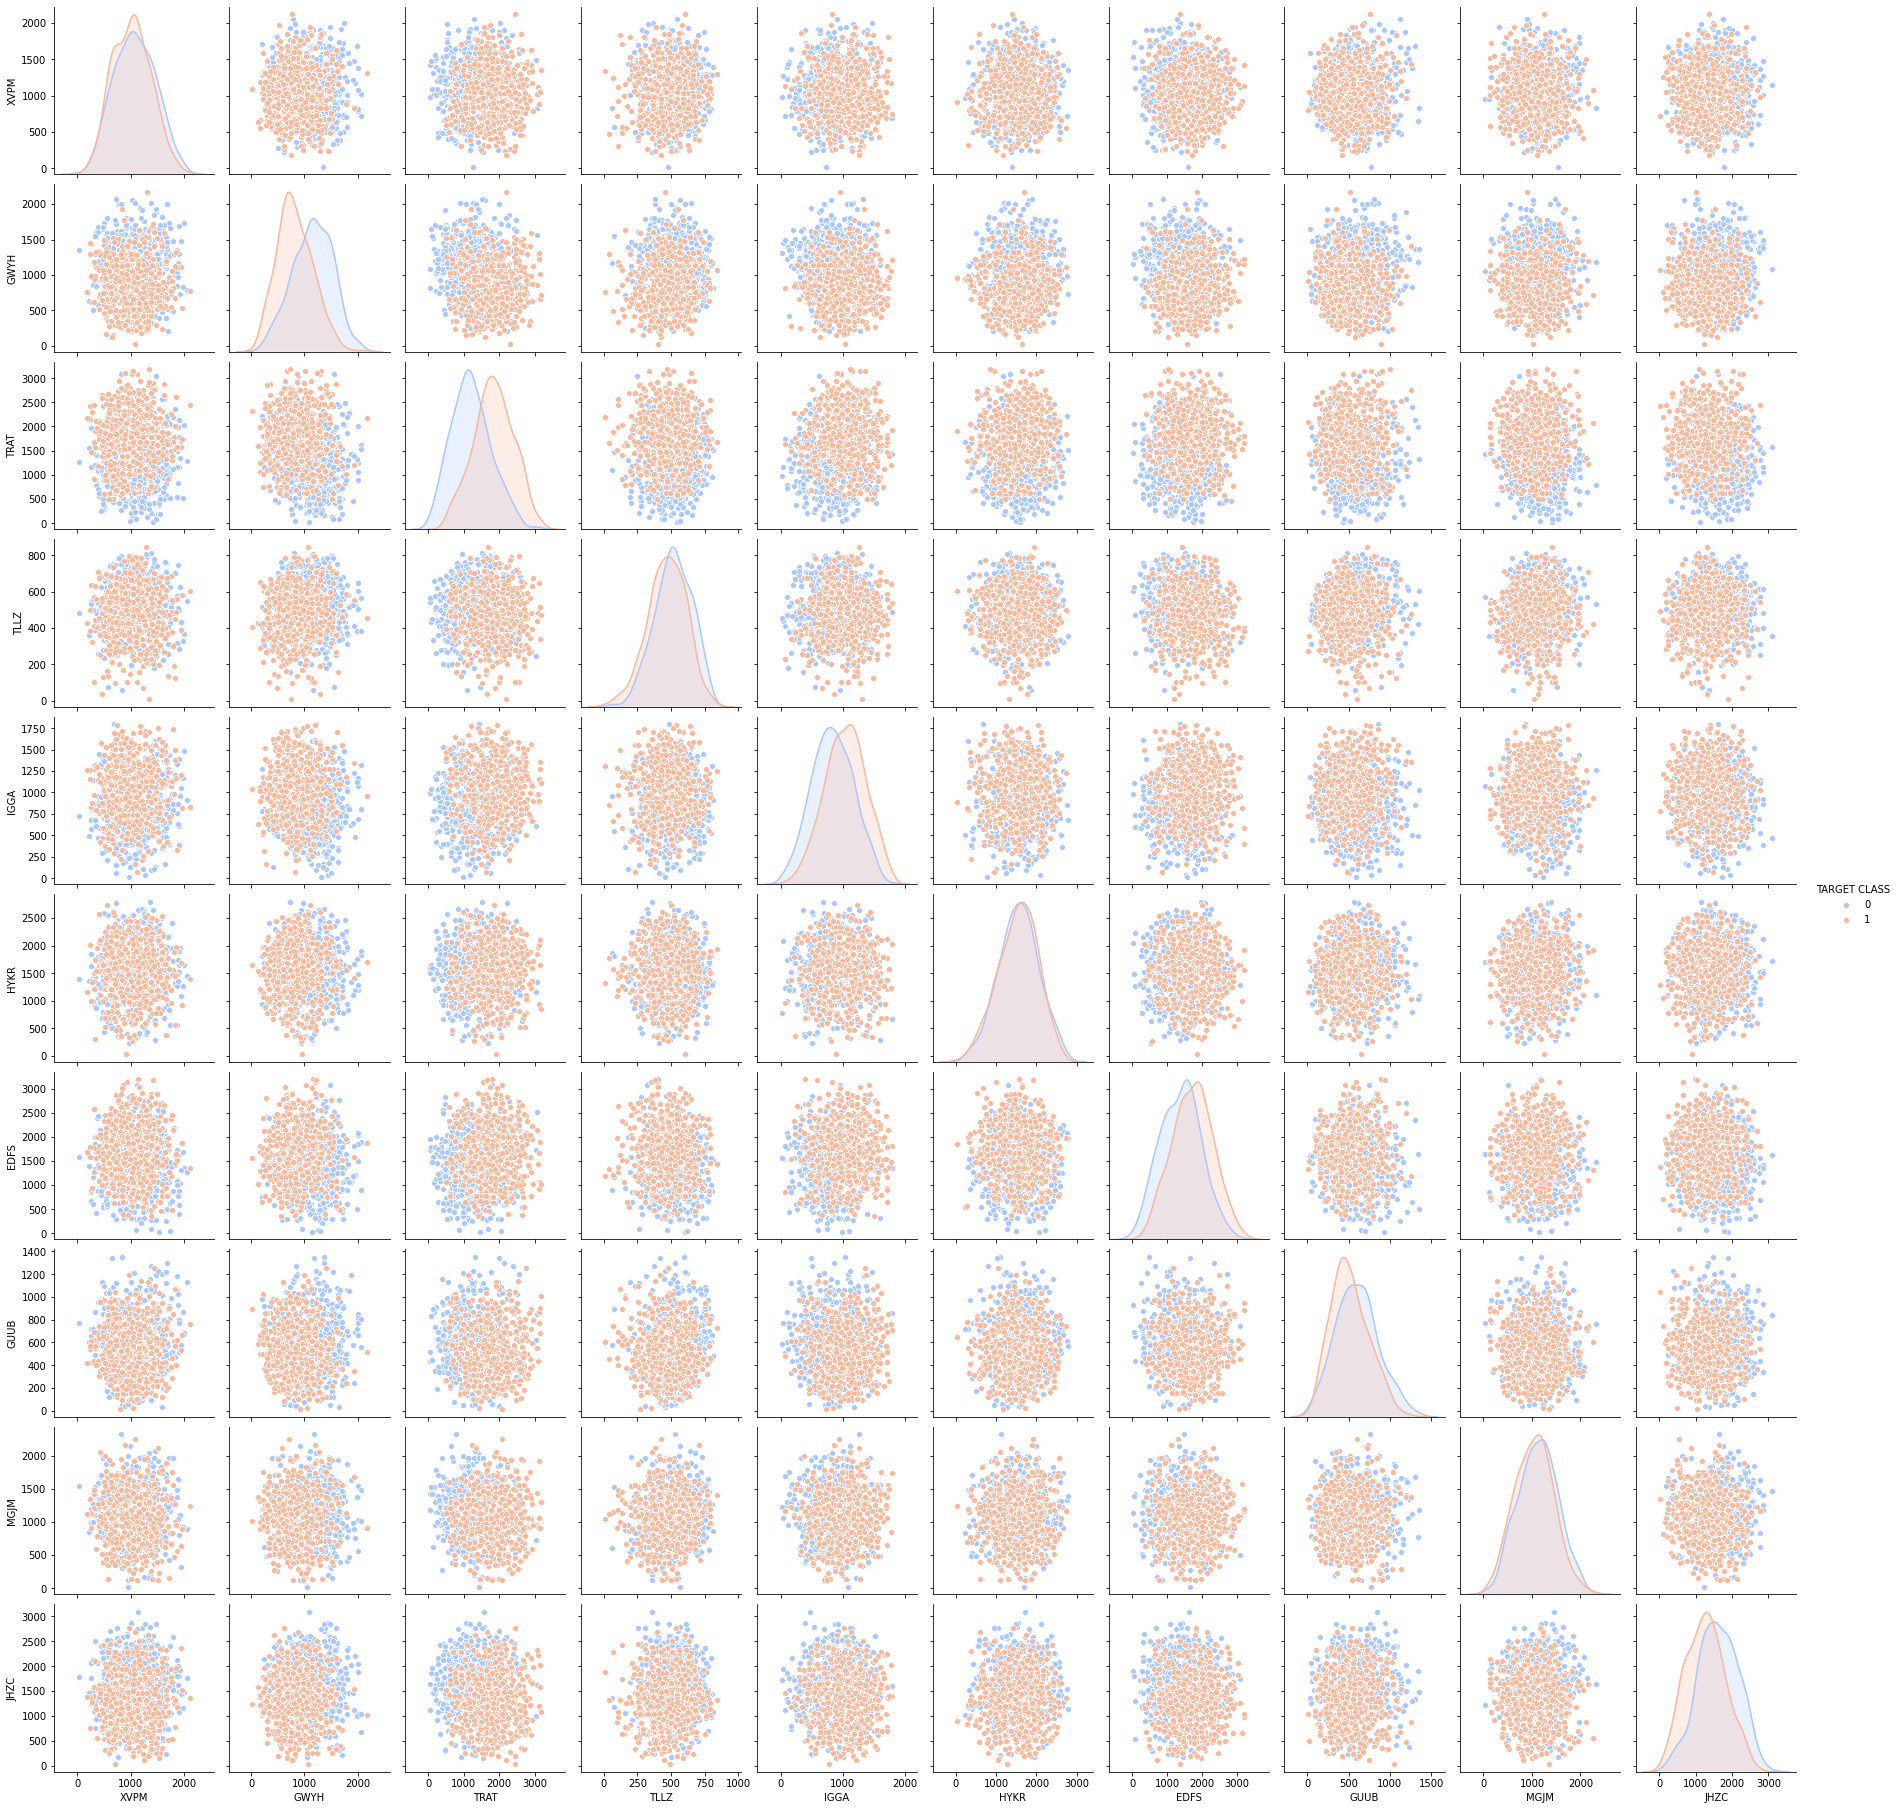

In [6]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

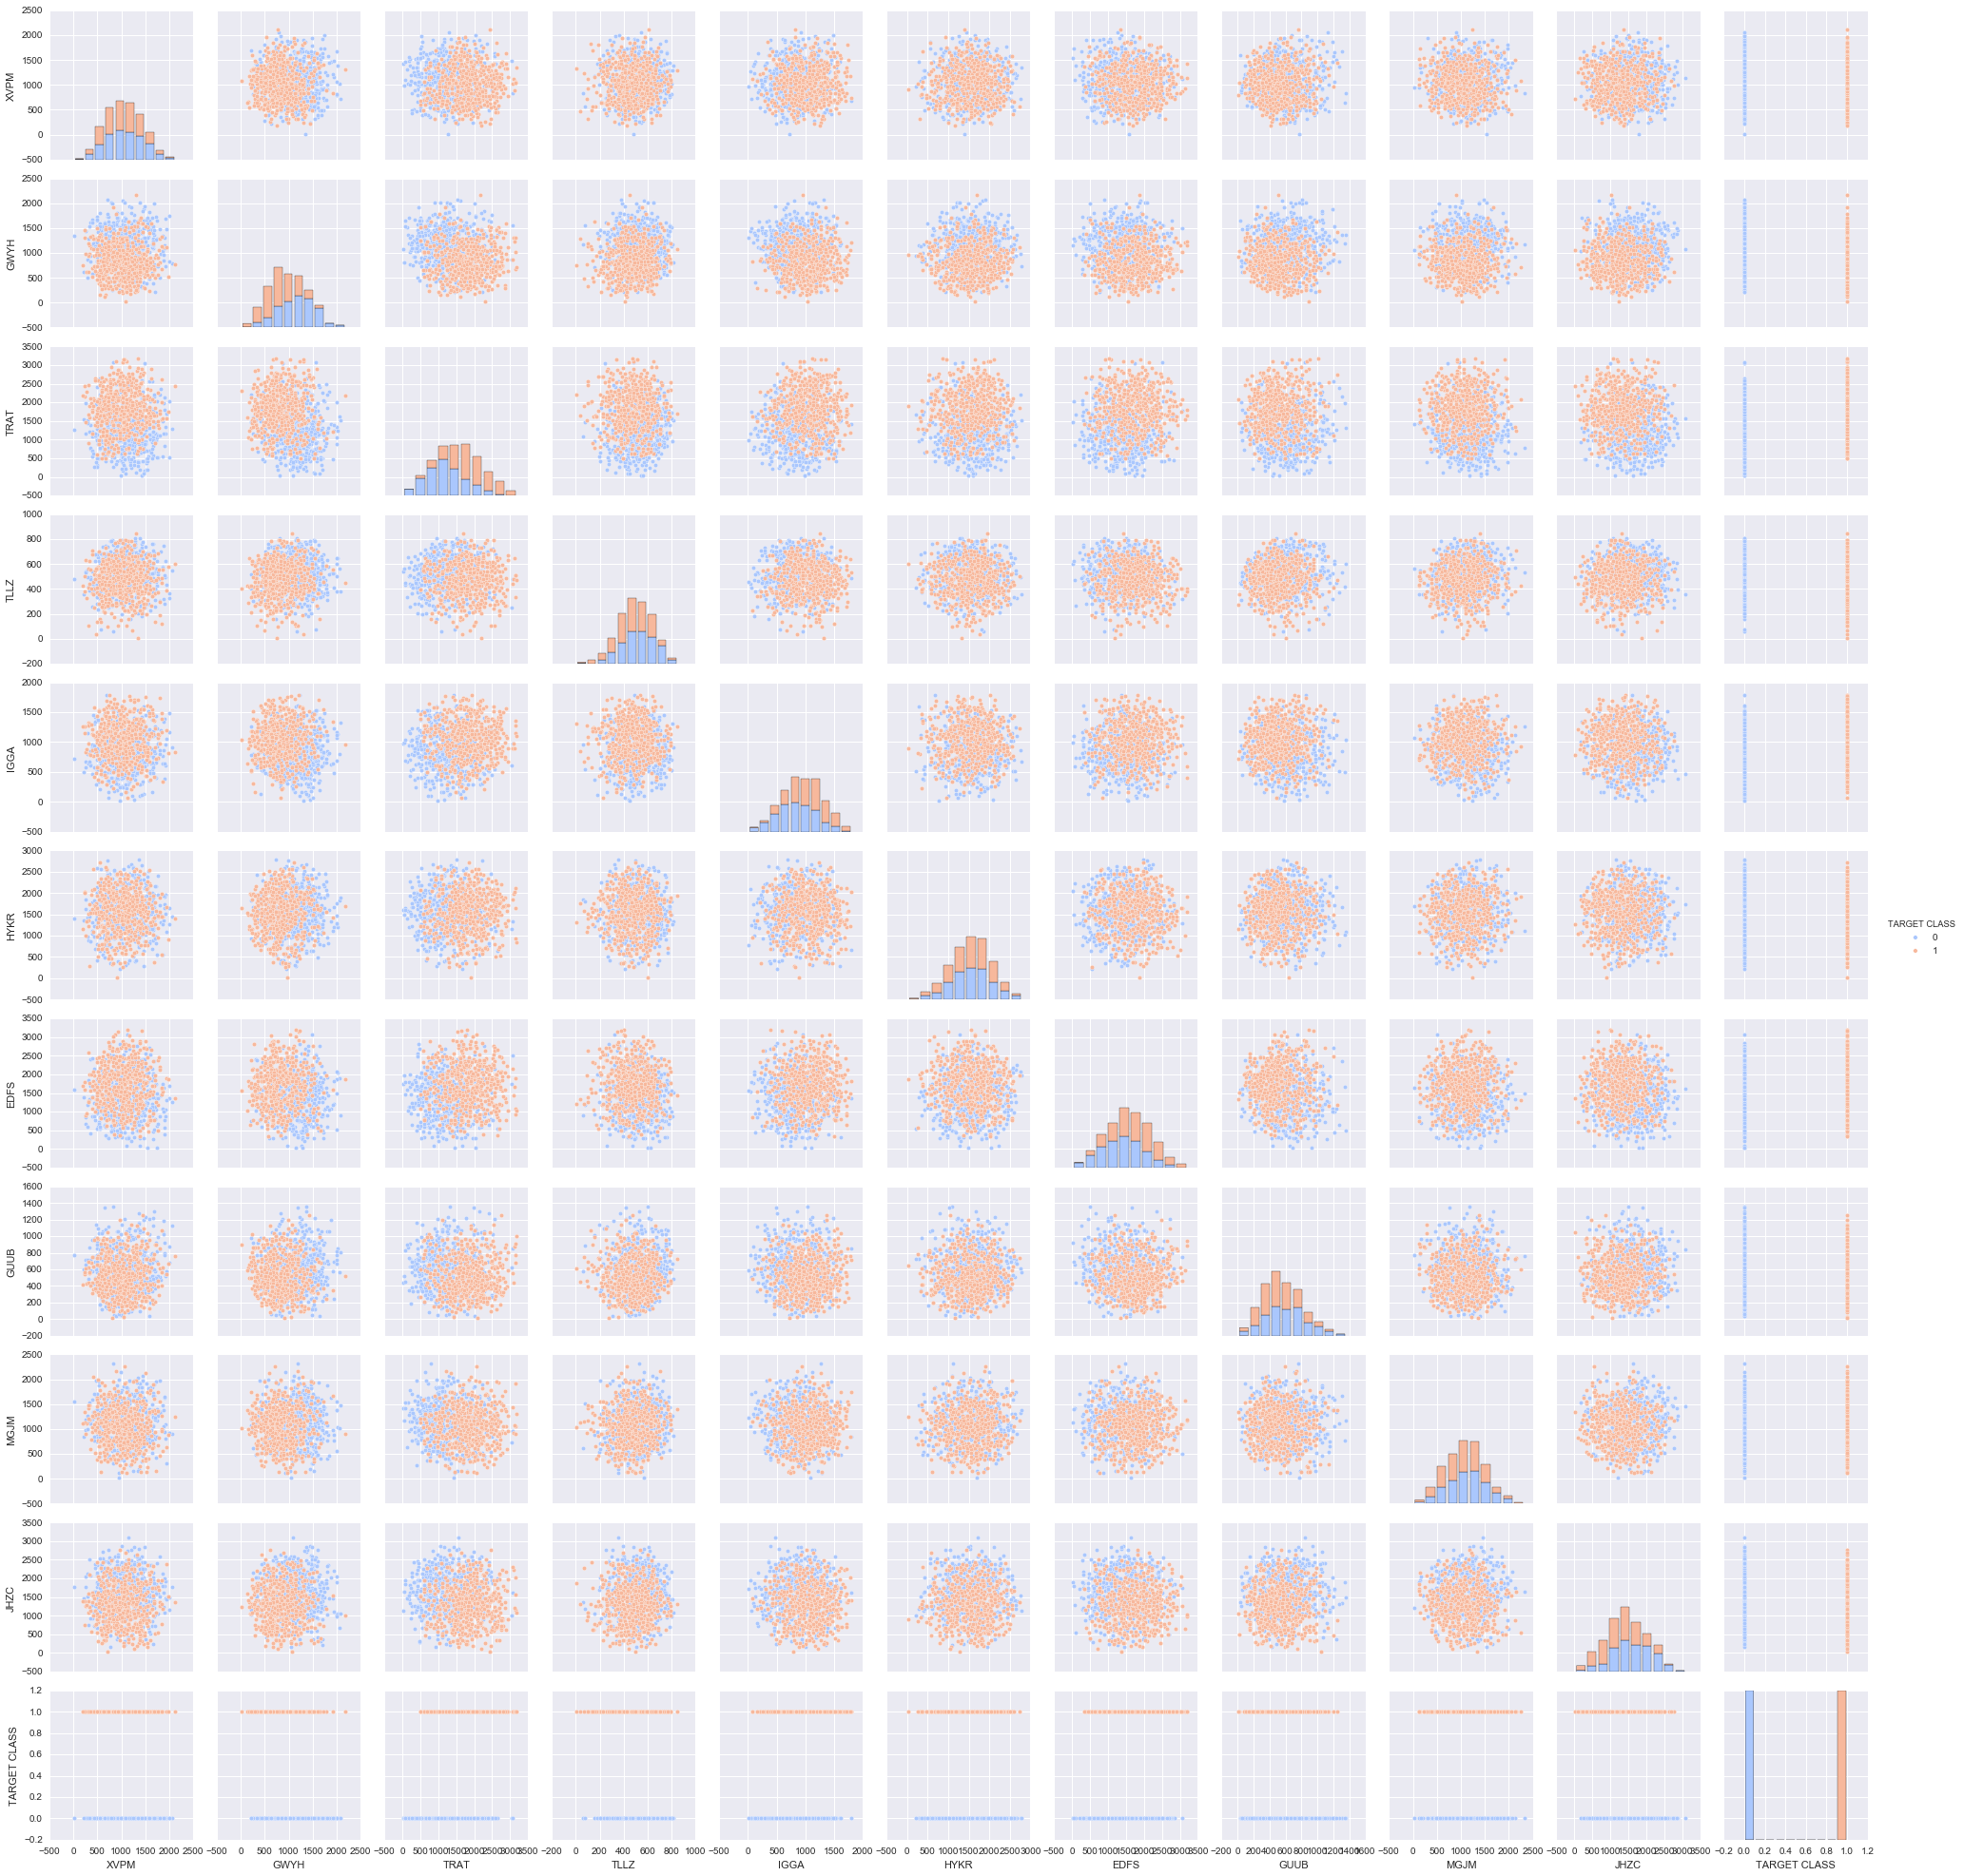

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [7]:
from sklearn.preprocessing import StandardScaler

** Crie um objeto StandardScaler() chamado scaler. **

In [8]:
scaler = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [10]:
parametros_padronizados = scaler.transform(df.drop('TARGET CLASS', axis=1))

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [13]:
df_param = pd.DataFrame(parametros_padronizados, columns=df.columns[:-1])
df_param.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [18]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [22]:
pred = knn.predict(X_test)

** Crie uma matriz de confusão e um relatório de classificação. **

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, pred))

[[123  33]
 [ 41 103]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       156
           1       0.76      0.72      0.74       144

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [26]:
taxa_erro = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    taxa_erro.append(np.mean(pred != y_test))

** Agora crie o seguinte gráfico usando as informações do seu loop. **

In [27]:
taxa_erro

[0.24666666666666667,
 0.28,
 0.2,
 0.22333333333333333,
 0.19666666666666666,
 0.19,
 0.19666666666666666,
 0.19333333333333333,
 0.19,
 0.17666666666666667,
 0.19666666666666666,
 0.17666666666666667,
 0.19333333333333333,
 0.18666666666666668,
 0.19,
 0.18,
 0.2,
 0.17666666666666667,
 0.19333333333333333,
 0.18333333333333332,
 0.19,
 0.17333333333333334,
 0.18333333333333332,
 0.17666666666666667,
 0.18666666666666668,
 0.18,
 0.18,
 0.17333333333333334,
 0.17666666666666667,
 0.17666666666666667,
 0.19333333333333333,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18333333333333332,
 0.18]

Text(0.5, 1.0, 'Taxa de erros vs Valor K')

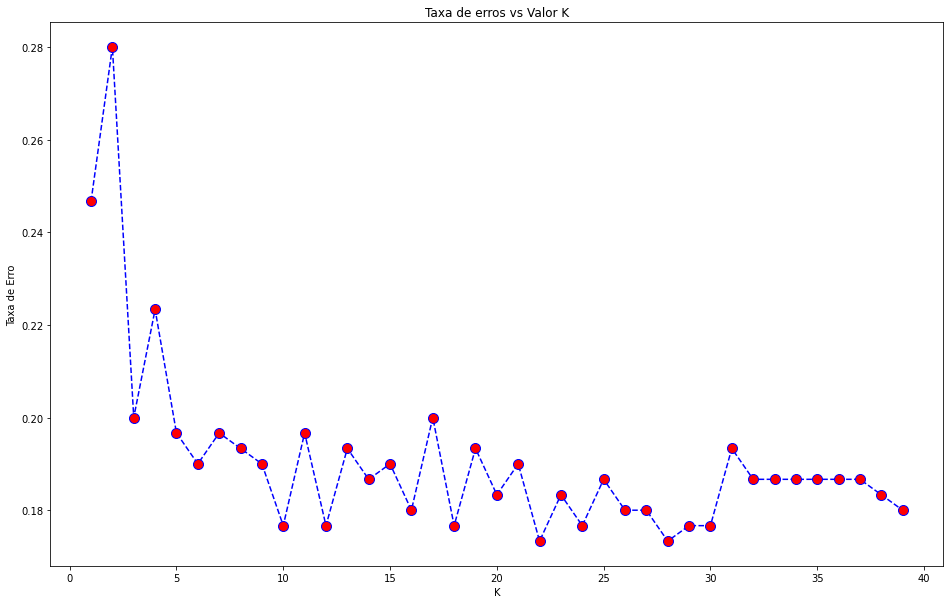

In [29]:
plt.figure(figsize=(16, 10))
plt.plot(range(1,40), taxa_erro, color="blue", linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
plt.title('Taxa de erros vs Valor K')

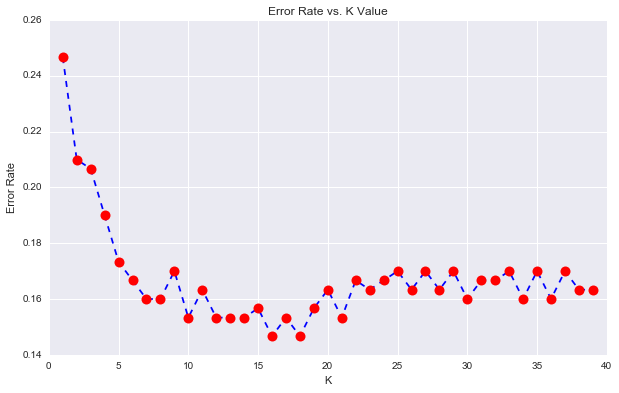

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [34]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[124  32]
 [ 21 123]]


              precision    recall  f1-score   support

           0       0.86      0.79      0.82       156
           1       0.79      0.85      0.82       144

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300

